In [1]:
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import numpy as np

import matplotlib
matplotlib.rcParams['figure.figsize'] = (16,8)

In [2]:
def consulta_bc(codigo_bcb):
  url = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json'.format(codigo_bcb)
  df = pd.read_json(url)
  df['data'] = pd.to_datetime(df['data'], dayfirst=True)
  df.set_index('data', inplace=True)
  return df

In [39]:
def anualiza_serie(ipca_gen):
    ipca_gen = (ipca_gen/100 + 1 )
    ipca_gen = np.power((ipca_gen),12)
    ipca_gen = (ipca_gen -1 ) * 100
    return ipca_gen

In [49]:
ipca = consulta_bc(433)

<AxesSubplot:xlabel='data'>

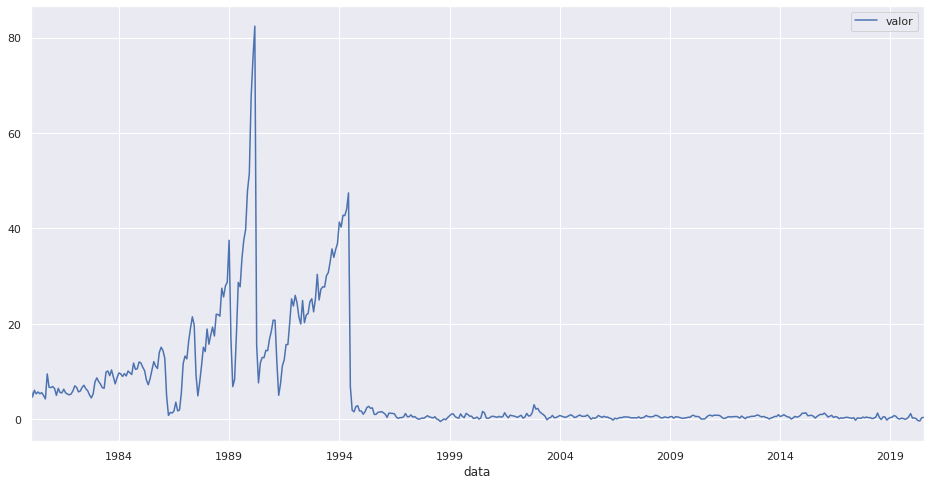

In [50]:
ipca.plot()

In [5]:
igpm = consulta_bc(189)

<AxesSubplot:xlabel='data'>

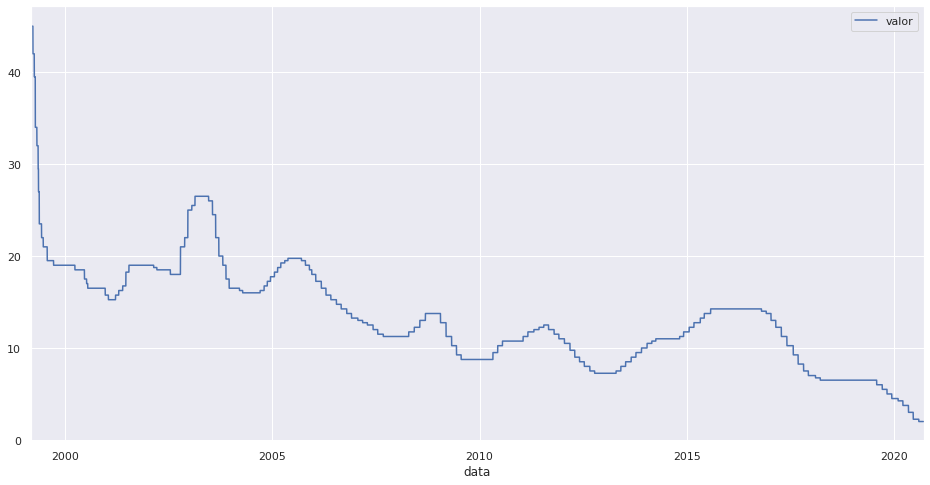

In [6]:
selic_meta = consulta_bc(432)
selic_meta.plot()

In [7]:
reservas_internacionais = consulta_bc(13621)

<AxesSubplot:xlabel='data'>

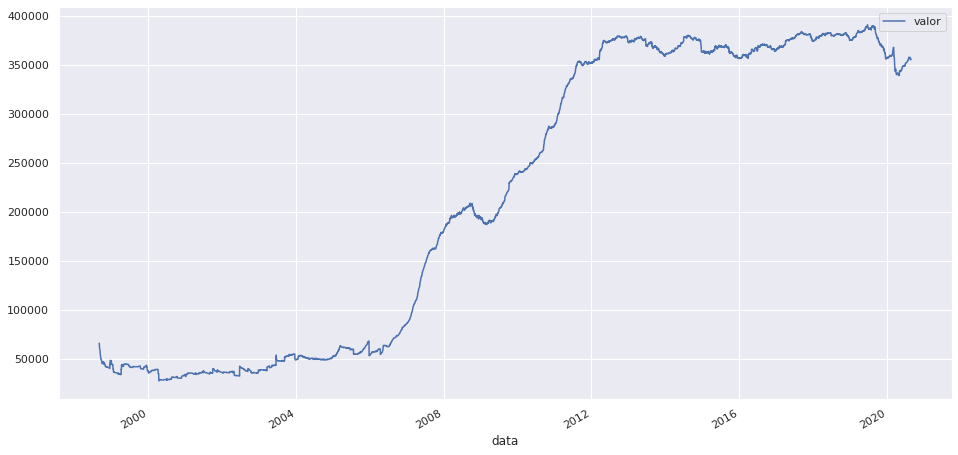

In [8]:
reservas_internacionais.plot()

In [9]:
pnad = consulta_bc(24369)
pnad

valor
data             
2012-03-01    7.9
2012-04-01    7.7
2012-05-01    7.6
2012-06-01    7.5
2012-07-01    7.4
...           ...
2020-02-01   11.6
2020-03-01   12.2
2020-04-01   12.6
2020-05-01   12.9
2020-06-01   13.3

[100 rows x 1 columns]

In [10]:
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf

Requirement already up-to-date: yfinance in /home/matheus/miniconda3/lib/python3.7/site-packages (0.1.54)


In [11]:
ibov = yf.download(tickers='^BVSP')[['Adj Close']]

[*********************100%***********************]  1 of 1 completed


In [12]:
ibov_retorno = ibov.pct_change()

In [13]:
cdi = consulta_bc(12)

In [44]:
data_inicio = '2006-01-01'

In [15]:
ibov_retorno_acumulado = (1 + ibov_retorno[ibov_retorno.index >= data_inicio]).cumprod()
ibov_retorno_acumulado.iloc[0] = 1

In [16]:
cdi_acumulado = (1 + cdi[cdi.index >= data_inicio] / 100).cumprod()
cdi_acumulado.iloc[0] = 1

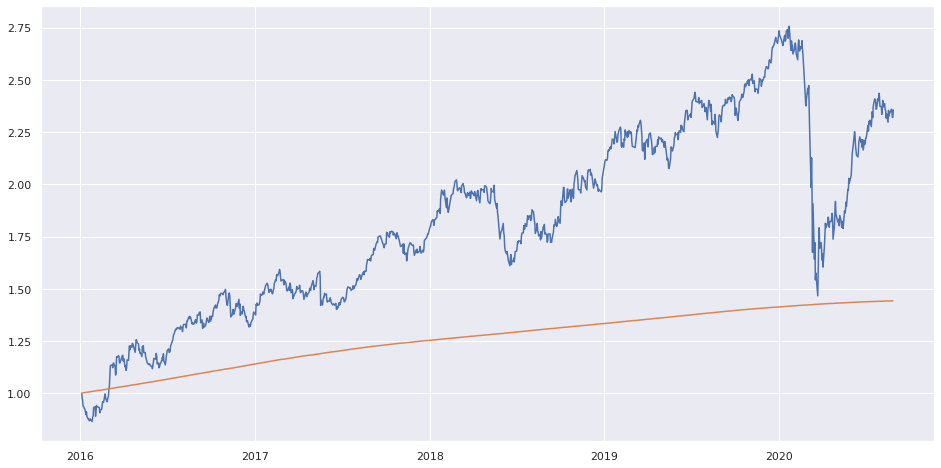

In [17]:
fig, ax = plt.subplots()
ax.plot(ibov_retorno_acumulado)
ax.plot(cdi_acumulado);

<AxesSubplot:xlabel='data'>

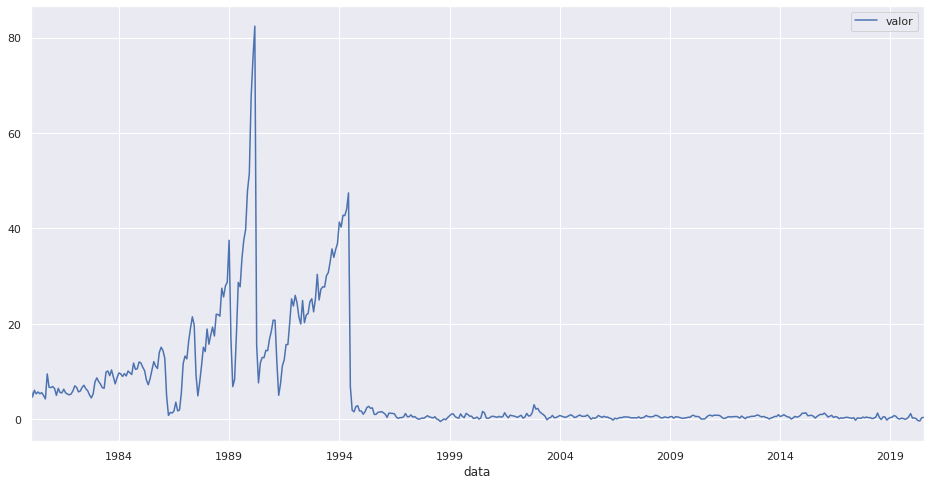

In [18]:
ipca = consulta_bc(433)
ipca.plot()

<AxesSubplot:xlabel='data'>

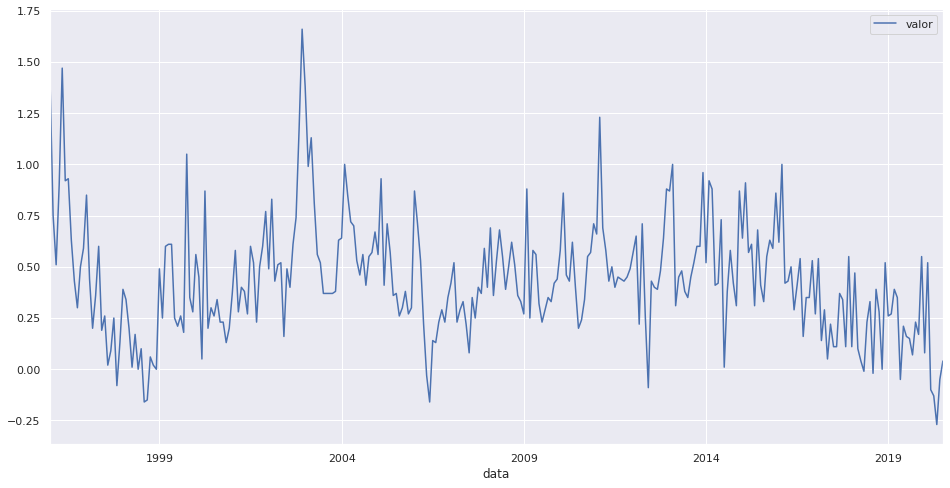

In [19]:
ipca_ms = consulta_bc(11427)
ipca_ms.plot()

<AxesSubplot:xlabel='data'>

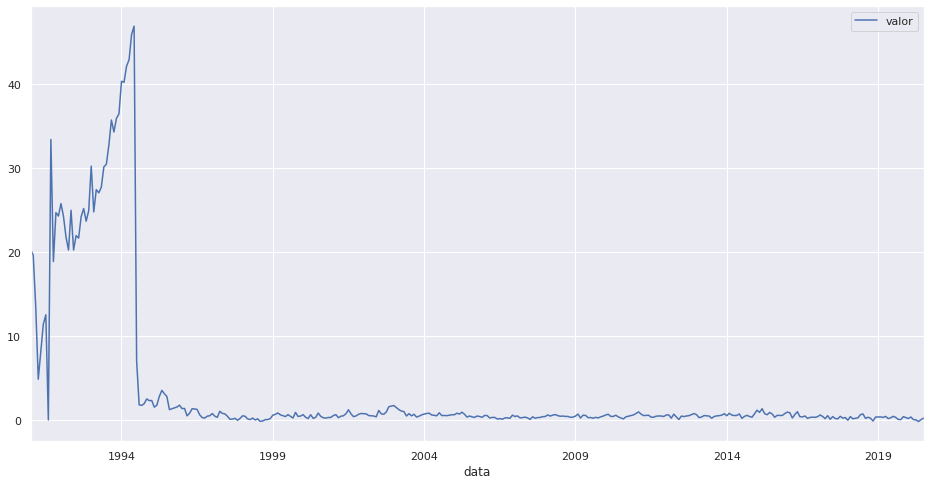

In [20]:
ipca_ma = consulta_bc(16121)
ipca_ma.plot()

<AxesSubplot:xlabel='data'>

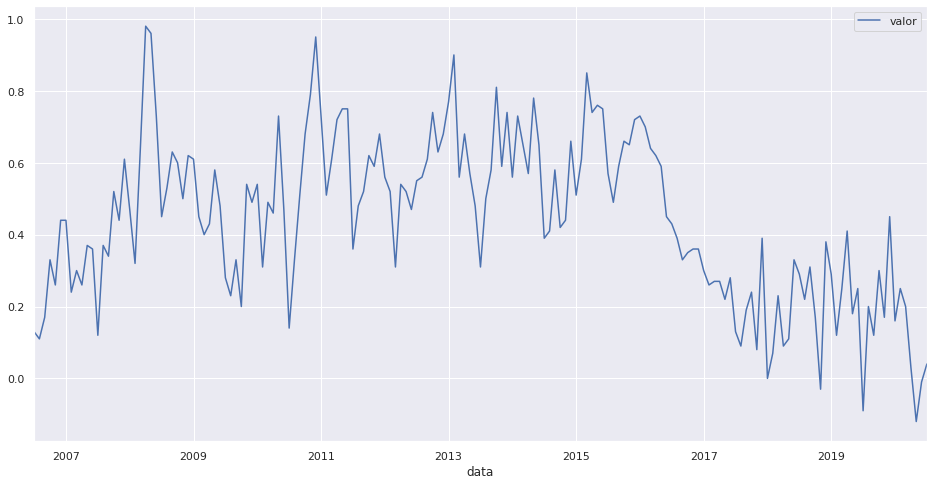

In [21]:
ipca_ex0 = consulta_bc(27838)
ipca_ex0.plot()

<AxesSubplot:xlabel='data'>

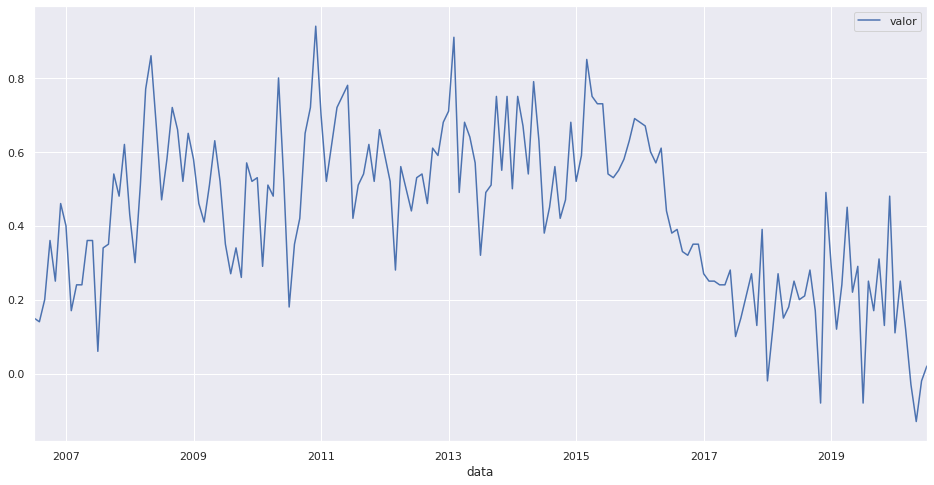

In [22]:
ipca_ex1 = consulta_bc(27839)
ipca_ex1.plot()

<AxesSubplot:xlabel='data'>

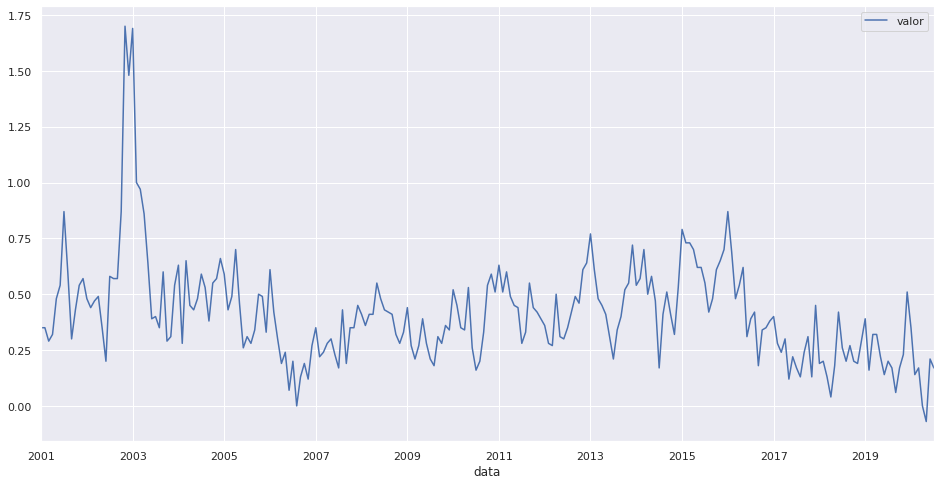

In [23]:
ipca_dp = consulta_bc(11426)
ipca_dp.plot()

<AxesSubplot:xlabel='data'>

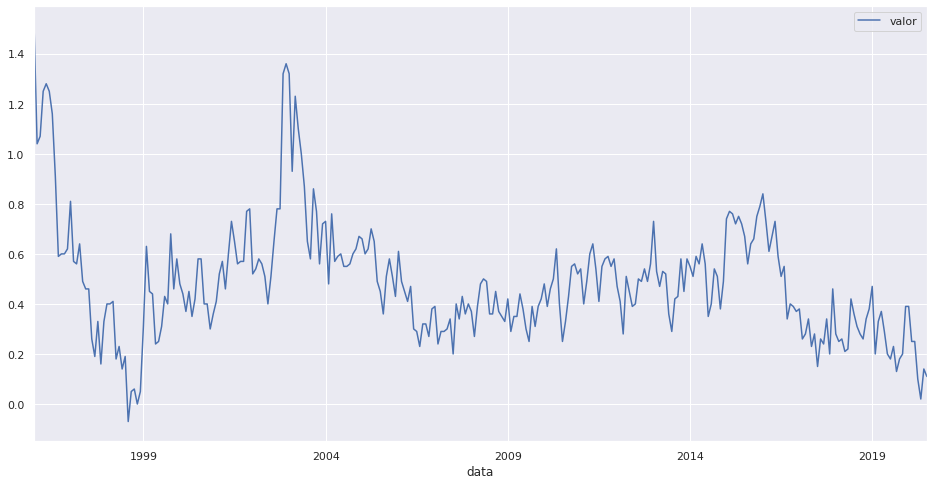

In [24]:
ipca_ex2 = consulta_bc(4466)
ipca_ex2.plot()

<AxesSubplot:xlabel='data'>

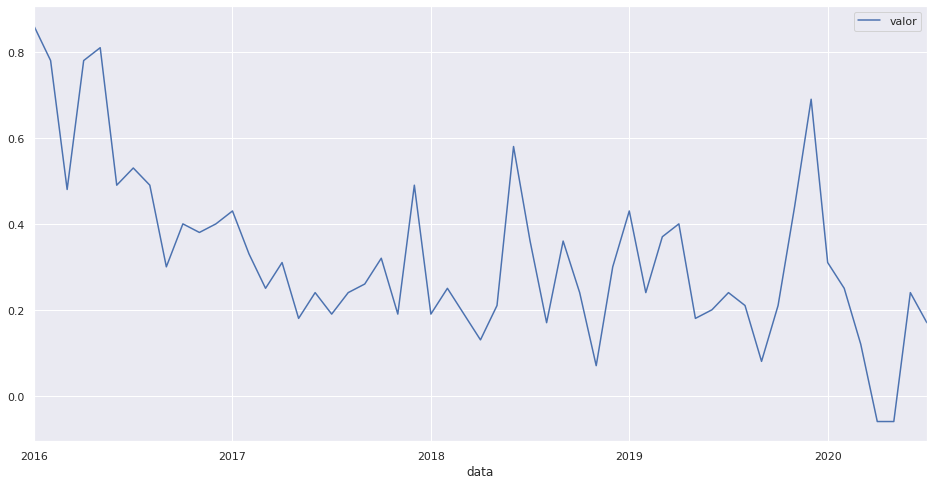

In [25]:
ipca_ex3 = consulta_bc(16122)
ipca_ex3 = ipca_ex3[ipca_ex3.index >= data_inicio]
ipca_ex3.plot()

In [34]:
ipca_ex3a = (ipca_ex3/100 + 1 )
ipca_ex3a = np.power((ipca_ex3a),12)
ipca_ex3a = (ipca_ex3a -1 ) * 100

<AxesSubplot:xlabel='data'>

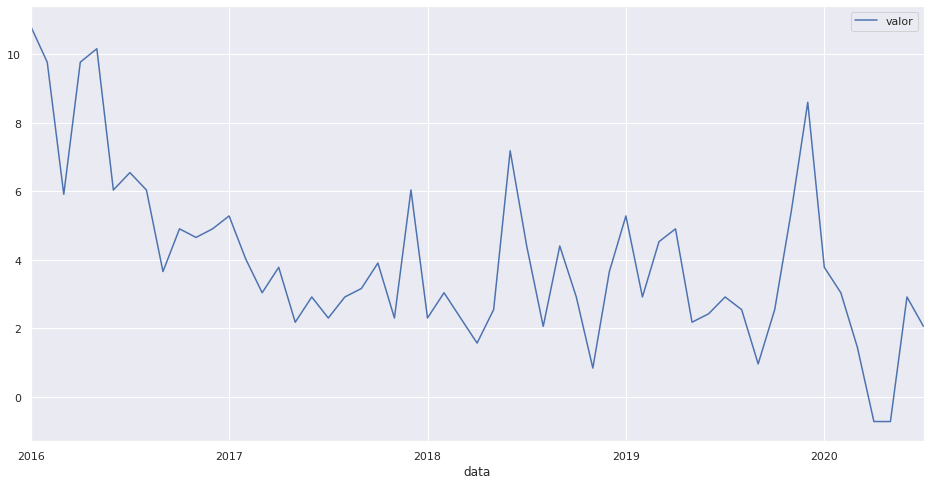

In [35]:
ipca_ex3a.plot()

In [51]:
ipca = anualiza_serie(ipca)

<AxesSubplot:xlabel='data'>

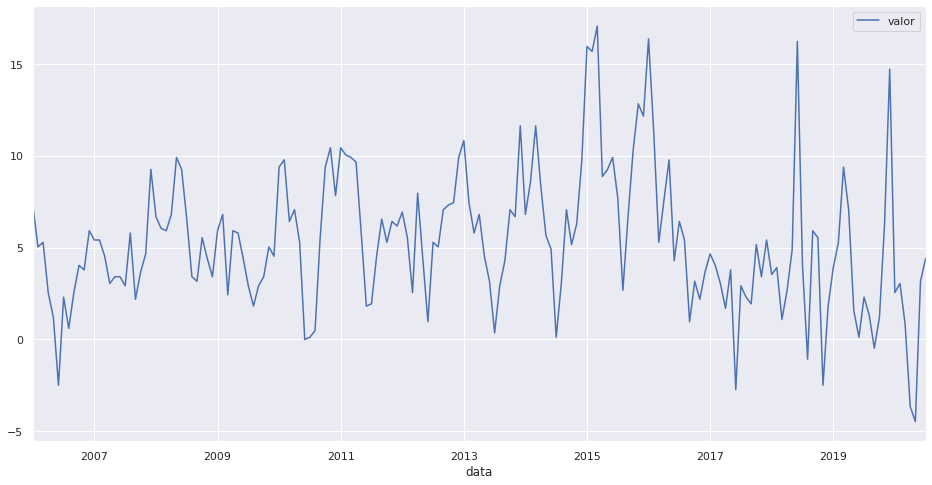

In [55]:
ipca = ipca[ipca.index >= data_inicio]
ipca.plot()